# Proyecto final de curso
## Uso de redes neuronales para la detección de transacciones fraudulentas de tarjeta de crédito
### David Tejeda - 9170350
### Juan Hernández - 9710120
### Mario Tabarini - 22000349

#### Fuente del dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud, por motivos didácticos, se eliminaron valores para generar faltantes y poner en práctica técnicas de ingeniería de catacterísticas.

In [16]:
# Se importan librerías necesarias para análisis de datos, así como para visualizaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Comprensión de los datos:

In [17]:
data = pd.read_csv("creditcard1.csv", sep=";")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Al evaluar la data es posible notar que de las 31 columnas, las principales características de interés son Time (tiempo desde el inicio del registro de datos hasta el momento de la transacción), Amount (monto de la transacción) y Class (1: transacción fraudulenta, 0 transacción legítima). Conforme a la documentación, se indica que las columnas V1-V28 corresponden a data a la que se le aplicó una reducción en su dimensionalidad mediante el método PCA.

In [18]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284801.000000,284057.000000,284799.000000,2.848070e+05,284795.000000,2.848070e+05,284799.000000,284740.000000,284028.000000,284741.000000,...,284791.000000,2.847910e+05,284791.000000,284779.000000,284769.000000,284791.000000,284760.000000,284797.000000,284684.000000,284807.000000
mean,94812.520019,0.000926,-0.000003,-5.127183e-13,0.000010,5.842808e-14,-0.000002,-0.000011,0.000146,0.000048,...,0.000002,7.288200e-07,-0.000012,-0.000013,0.000019,-0.000001,-0.000020,-0.000006,88.356313,0.001727
std,47487.749355,1.959241,1.651331,1.516255e+00,1.415881,1.380247e+00,1.332285,1.237118,1.195222,1.098673,...,0.734541,7.256996e-01,0.624470,0.605647,0.521266,0.482235,0.403637,0.330080,250.141435,0.041527
min,0.000000,-56.407510,-72.715728,-4.832559e+01,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-1.093314e+01,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.000000,-0.919811,-0.598566,-8.903648e-01,-0.848648,-6.915971e-01,-0.768299,-0.554041,-0.208765,-0.643063,...,-0.228395,-5.423504e-01,-0.161856,-0.354596,-0.317128,-0.326992,-0.070844,-0.052961,5.590000,0.000000
50%,84690.000000,0.018866,0.065507,1.798463e-01,-0.019843,-5.433583e-02,-0.274220,0.040079,0.022349,-0.051403,...,-0.029450,6.781038e-03,-0.011208,0.040976,0.016636,-0.052152,0.001341,0.011244,22.000000,0.000000
75%,139320.000000,1.316568,0.803734,1.027196e+00,0.743355,6.119264e-01,0.398571,0.570339,0.327593,0.597185,...,0.186387,5.285447e-01,0.147630,0.439527,0.350735,0.240959,0.091032,0.078279,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558e+00,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,27.202839,1.050309e+01,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


### Análisis descriptivo de la data. Se buscan valores faltantes.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284801 non-null  float64
 1   V1      284057 non-null  float64
 2   V2      284799 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284795 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284799 non-null  float64
 7   V7      284740 non-null  float64
 8   V8      284028 non-null  float64
 9   V9      284741 non-null  float64
 10  V10     284726 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284783 non-null  float64
 14  V14     284741 non-null  float64
 15  V15     284782 non-null  float64
 16  V16     284797 non-null  float64
 17  V17     284797 non-null  float64
 18  V18     284797 non-null  float64
 19  V19     284797 non-null  float64
 20  V20     284791 non-null  float64
 21  V21     28

In [20]:
proporcion_nulos = data.isnull().mean()
print(proporcion_nulos)

Time      0.000021
V1        0.002633
V2        0.000028
V3        0.000000
V4        0.000042
V5        0.000000
V6        0.000028
V7        0.000235
V8        0.002735
V9        0.000232
V10       0.000284
V11       0.000000
V12       0.000000
V13       0.000084
V14       0.000232
V15       0.000088
V16       0.000035
V17       0.000035
V18       0.000035
V19       0.000035
V20       0.000056
V21       0.000056
V22       0.000056
V23       0.000056
V24       0.000098
V25       0.000133
V26       0.000056
V27       0.000165
V28       0.000035
Amount    0.000432
Class     0.000000
dtype: float64


In [21]:
for columna in data: # Aunque la proporción de valores nulos es muy baja, se procederá a imputar la media para cada columna
    if data[columna].dtype=='float64' or data[columna].dtype=='int64':
        media = data[columna].mean()
        data[columna]=np.round(data[columna].fillna(media))

In [22]:
proporcion_nulos = data.isnull().mean()
print(proporcion_nulos)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


In [23]:
data.Class.value_counts() # Se determina la cantidad de valores para la columna "Class", la cual es nuestro target.

0    284315
1       492
Name: Class, dtype: int64

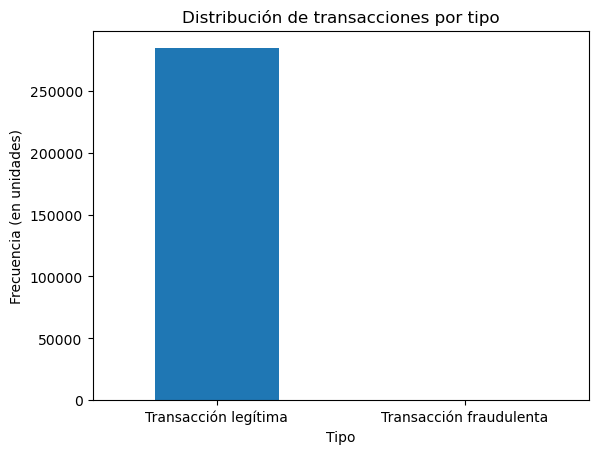

In [24]:
tipo = ["Transacción legítima", "Transacción fraudulenta"]

count = pd.value_counts(data['Class'], sort = True)
count.plot(kind = 'bar', rot=0)
plt.title("Distribución de transacciones por tipo")
plt.xticks(range(2), tipo)
plt.xlabel("Tipo")
plt.ylabel("Frecuencia (en unidades)");

#### El dataset se encuentra desbalanceado, mostrando un claro sesgo hacia las transacciones legítimas, pudiendo repercutir de manera negativa en el modelo.

### Graficando correlaciones entre variables

Text(0.5, 1.0, 'Cantidad de transacciones respecto al tiempo (en segundos)')

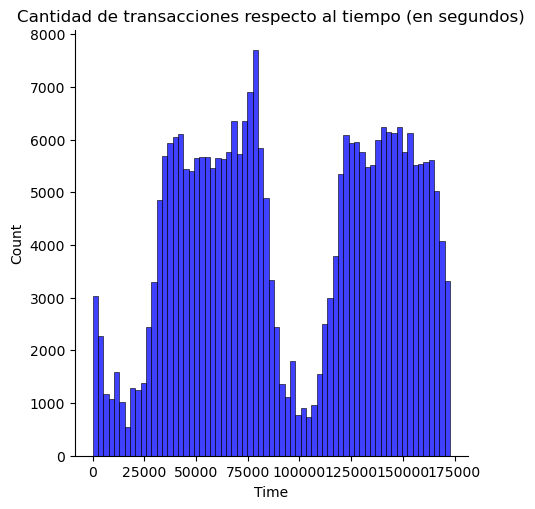

In [25]:
sns.displot(data['Time'], color='blue') #Graficando la cantidad de transacciones conforme al tiempo (en segundos)
plt.title("Cantidad de transacciones respecto al tiempo (en segundos)")

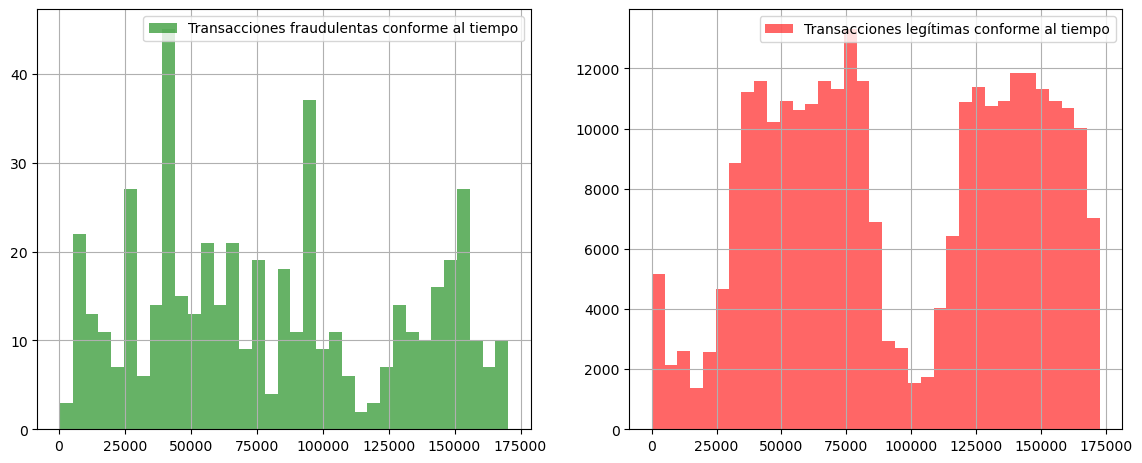

In [26]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='green', alpha=0.6, label="Transacciones fraudulentas conforme al tiempo")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='red', alpha=0.6, label="Transacciones legítimas conforme al tiempo")
plt.legend()

#### No se muestra una tendencia clara de transacciones fraudulentas conforme al paso del tiempo.

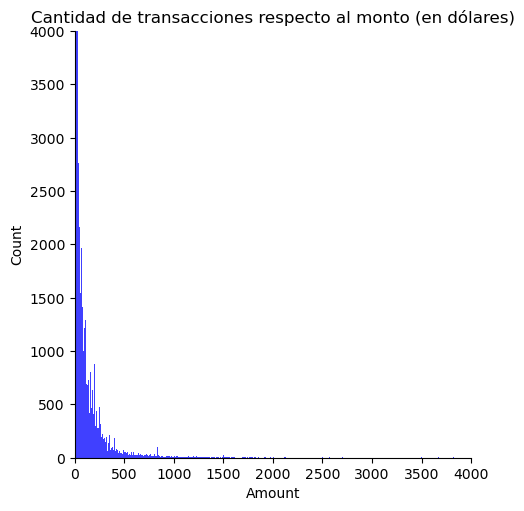

In [27]:
sns.displot(data['Amount'], color='blue') #Graficando la cantidad de transacciones conforme a su monto (en dólares)
plt.title("Cantidad de transacciones respecto al monto (en dólares)")

plt.xlim(0, 4000)
plt.ylim(0, 4000)
plt.show()

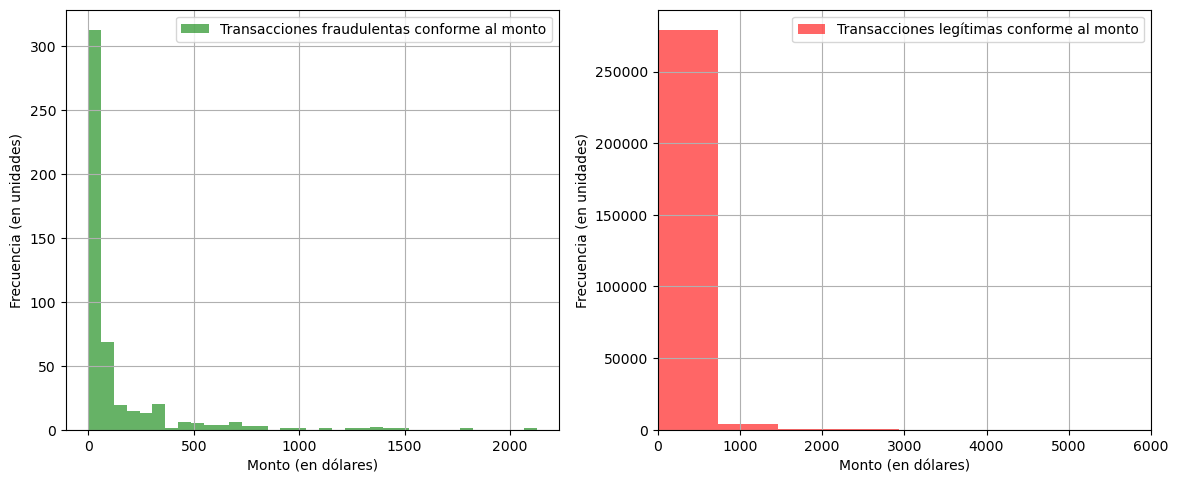

In [28]:
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Amount.hist(bins=35, color='green', alpha=0.6, label="Transacciones fraudulentas conforme al monto")
plt.legend()
plt.xlabel("Monto (en dólares)")
plt.ylabel("Frecuencia (en unidades)")


plt.subplot(2, 2, 2)
data[data.Class == 0].Amount.hist(bins=35, color='red', alpha=0.6, label="Transacciones legítimas conforme al monto")
plt.legend()
plt.xlabel("Monto (en dólares)")
plt.ylabel("Frecuencia (en unidades)") 
plt.xlim(0, 6000)

plt.show()

#### Las transacciones van disminuyendo de manera inversamente proporcional a su monto. No hay una correlación entre el monto de una transacción y su fraudulencia.

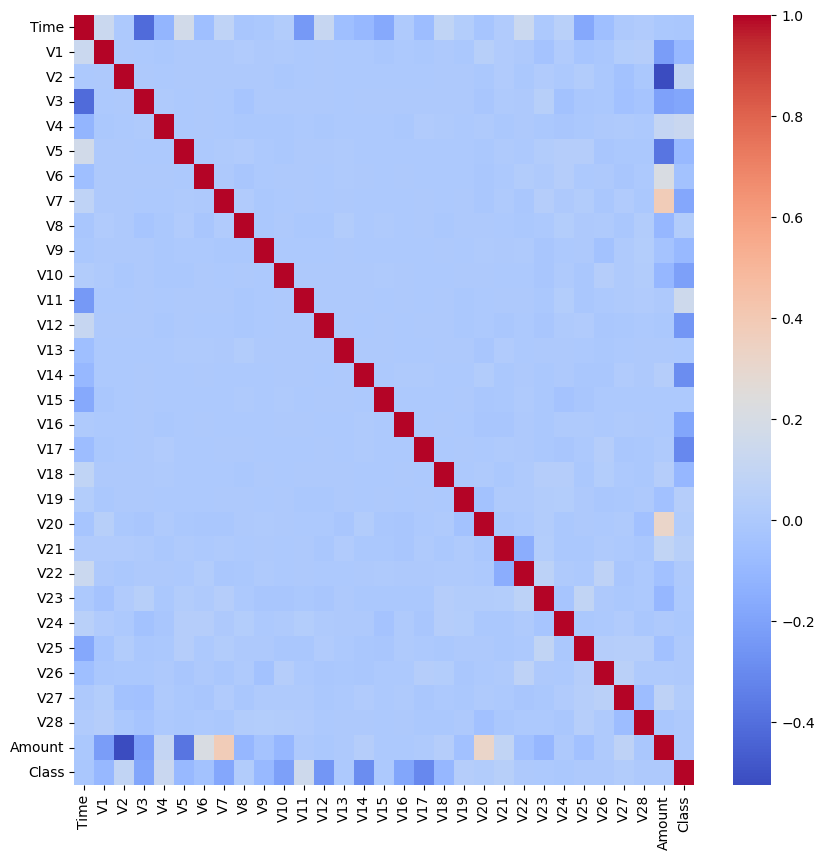

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="coolwarm")
plt.show()

#### Se muestra la matriz de correlación para las 31 variables. En este sentido, V2 y V5 muestran una alta correlación con Amount, V3 con Time, y V17 con Class.
#### Se observa que entre time, amount y class no existe una correlación significativa.

### Preparación de Datos:

### Normalización de datos

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler() # Se crea instancia de función para normalizar datos.

X = data.drop('Class', axis=1) # Se realiza un subset de los datos, tomando en cuenta únicamente las variables independientes
y = data.Class #Se realiza un subset sobre la variable objetivo

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Se divide la data en conjuntods de entrenamiento (70%) y prueba (30%)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, test_size=0.2, random_state=42) # El conjunto de datos de entrenamiento se divide en entrenamiento (80%) y validación (20%) para correcciones en el etrenamiento de la red neuronal.

X_train = scalar.fit_transform(X_train) # Se normaliza conjunto de datos de variables independientes de entrenamiento
X_validate = scalar.transform(X_validate)# Se normaliza conjunto de datos de variables independientes de validación
X_test = scalar.transform(X_test)# Se normaliza conjunto de datos de variables independientes de prueba

peso_fraude = y_train.value_counts()[1] / len(y_train)
peso_legitimas = y_train.value_counts()[0] / len(y_train)

print(f"Peso de transacciones fraudulentas: {peso_fraude}")
print(f"Peso de transacciones no fraudulentas: {peso_legitimas}")

Peso de transacciones fraudulentas: 0.0017994745785028623
Peso de transacciones no fraudulentas: 0.9982005254214972


### Modelado:

### Construcción del modelo de redes neuronales artificiales (ANNs)

In [31]:
from tensorflow import keras

model = keras.Sequential([ # Se crea el modelo que contendrá 3 capas totalmente conectadas iniciales de 300 neuronas cada una, con activación ReLu
    keras.layers.Dense(300, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(), # Se regulariza la red conforme al batch 
    keras.layers.Dropout(0.3), # Se hace un dropout para evitar sobreajuste
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'), # Se crea una capa de salida con función de activación sigmoide (empleada con mayor frecuencia para salidas de tipo binario).
])

model.summary() # Se imprimen los datos del modelo resultante.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               9300      
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 300)               0

In [32]:
# Se crea un conjunto de métricas que permitirán evaluar el modelo conforme a cada iteración en su entrenamiento
metricas = [
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='vn'),
    keras.metrics.TruePositives(name='vp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='sensibilidad')
]

model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=metricas) # Se compila el modelo, tomando en consideración un optimizador Adam con tasa de aprendizaje 0.0001, función de pérdida binary_crossentropy y el conjunto de métricas creado anteriormente

peso_clase = {0:peso_legitimas, 1:peso_fraude} # Se balancean los resultados de la clase para evitar inconvenientes con sesgos

r = model.fit( # Se entrena el modelo de la red neuronal
    X_train, y_train, # Se envían como parámetros los datos de entrenamiento
    validation_data=(X_validate, y_validate), # Se usa la data de validación para evaluar el rendmimiento del modelo
    batch_size=2400, # Tamaño de lote de 2400 ejemplos de la data a la vez
    epochs=300, # Se establecen 300 épocas iniciales (300 ciclos completos en los que pasa el dataset de entrenamiento completo)
    #class_weight=peso_clase, # Se asignan los pesos para tratar el desequilibrio
)

Epoch 1/300
67/67 [==============================] - 22s 227ms/step - loss: 0.8166 - accuracy: 1.3794e-04 - fn: 52.0000 - fp: 74315.0000 - vn: 84889.0000 - vp: 235.0000 - precision: 0.0032 - sensibilidad: 0.8188 - val_loss: 0.6299 - val_accuracy: 0.0000e+00 - val_fn: 10.0000 - val_fp: 3036.0000 - val_vn: 36768.0000 - val_vp: 59.0000 - val_precision: 0.0191 - val_sensibilidad: 0.8551
Epoch 2/300
67/67 [==============================] - 13s 195ms/step - loss: 0.7010 - accuracy: 3.0723e-04 - fn: 40.0000 - fp: 63268.0000 - vn: 95936.0000 - vp: 247.0000 - precision: 0.0039 - sensibilidad: 0.8606 - val_loss: 0.5687 - val_accuracy: 2.0064e-04 - val_fn: 11.0000 - val_fp: 799.0000 - val_vn: 39005.0000 - val_vp: 58.0000 - val_precision: 0.0677 - val_sensibilidad: 0.8406
Epoch 3/300
67/67 [==============================] - 13s 191ms/step - loss: 0.6266 - accuracy: 4.8906e-04 - fn: 45.0000 - fp: 51653.0000 - vn: 107551.0000 - vp: 242.0000 - precision: 0.0047 - sensibilidad: 0.8432 - val_loss: 0.54

### Evaluación:

In [33]:
score = model.evaluate(X_test, y_test) # Se evalúa el modelo con los datos de prueba
print(score)

2671/2671 [==============================] - 16s 6ms/step - loss: 0.0040 - accuracy: 0.0031 - fn: 24.0000 - fp: 16.0000 - vn: 85291.0000 - vp: 112.0000 - precision: 0.8750 - sensibilidad: 0.8235
[0.004001592751592398, 0.0030663716606795788, 24.0, 16.0, 85291.0, 112.0, 0.875, 0.8235294222831726]


#### Habiendo evaluado los datos de prueba, se determinó que estos tienen una función de pérdida de 0.0042 (bastante aceptable), así como una precisión de 0.8843, lo cual representa un alto rendimiento que no cae en el overfitting. Asimismo, la sensibilidad de 0.7868 indica que una tasa de verdaderos positivos alta. 

### Graficando función de pérdida, accuracy, precisión y sensibilidad y comparando cada una con su métrica respectiva de validación

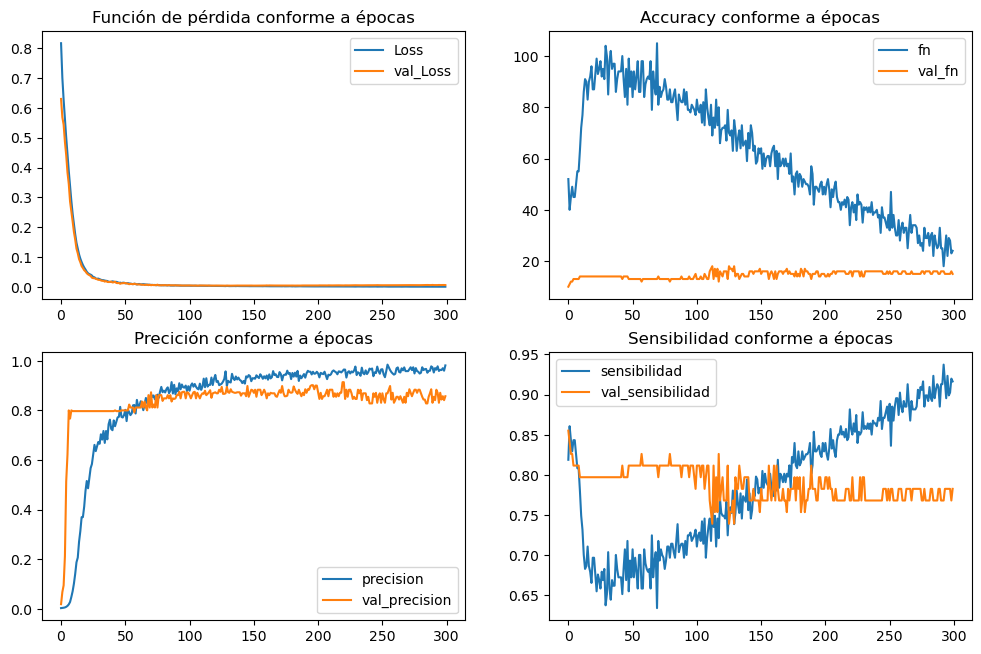

In [34]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Función de pérdida conforme a épocas')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['fn'], label='fn')
plt.plot(r.history['val_fn'], label='val_fn')
plt.title('Accuracy conforme a épocas')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precición conforme a épocas')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['sensibilidad'], label='sensibilidad')
plt.plot(r.history['val_sensibilidad'], label='val_sensibilidad')
plt.title('Sensibilidad conforme a épocas')
plt.legend()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score # Se importan librerías para evaluar el modelo

def print_score(clasificacion, prediccion, train=True): # Se crea función para imprimir la calificación del modelo con la data de entrenamiento y la predicha correspondiente como parámetros
    if train: 
        clf_report = pd.DataFrame(classification_report(clasificacion, prediccion, output_dict=True)) # Si la data que se envió como parámetro es de entrenamiento, se procesa aquí para generar el reporte de métricas
        print("Resultados de entrenamiento:\n-------------------------------------------------")
        print(f"Accuracy: {accuracy_score(clasificacion, prediccion) * 100:.2f}%") # Se imprime el accuracy de la data de entrenamiento con dos decimales
        print("_______________________________________________")
        print(f"Reporte de clasificación:\n{clf_report}") # Se imprimen métricas de entrenamiento
        print("_______________________________________________")
        print(f"Matriz de confusión: \n {confusion_matrix(y_train, prediccion)}\n") # Se imprimen métricas de data de entrenamiento
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(clasificacion, prediccion, output_dict=True)) # Si la data que se envió como parámetro es de prueba, se procesa aquí para generar el reporte de métricas
        print("Resultados de prueba:\n================================================")        
        print(f"Accuracy: {accuracy_score(clasificacion, prediccion) * 100:.2f}%") # Se imprime el accuracy de la data de prueba con dos decimales
        print("_______________________________________________")
        print(f"Reporte de clasificación:\n{clf_report}") # Se imprimen métricas de prueba
        print("_______________________________________________")
        print(f"Matriz de confusión: \n {confusion_matrix(clasificacion, prediccion)}\n") # Se imprimen métricas de data de prueba

### Despliegue:

In [36]:
y_train_pred = model.predict(X_train) # Se evalúa el modelo con la data de entrenamiento
y_test_pred = model.predict(X_test)  # Se evalúa el modelo con la data de prueba

# Se imprimen los resultados del modelo evaluado con data de entrenamiento y de prueba
print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)


2671/2671 [==============================] - 11s 4ms/step
Resultados de entrenamiento:
-------------------------------------------------
Accuracy: 100.00%
_______________________________________________
Reporte de clasificación:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999956    1.000000  0.999956       0.999978       0.999956
recall          1.000000    0.975610  0.999956       0.987805       0.999956
f1-score        0.999978    0.987654  0.999956       0.993816       0.999956
support    159204.000000  287.000000  0.999956  159491.000000  159491.000000
_______________________________________________
Matriz de confusión: 
 [[159204      0]
 [     7    280]]

Resultados de prueba:
Accuracy: 99.95%
_______________________________________________
Reporte de clasificación:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999719    0.875000  0.999532      0.937359      0.999520
recall         0.9

### Cierre del proyecto, monitoreo y mantenimiento:
#### Habiendo culminado el modelo se evidenció la alta precisión y baja función de pérdida, tanto en sus resultados de entrenamiento como en prueba. El modelo en sí permitirá a una organización, con base en sus diversos parámetros, determinar transacciones fraudulentas, de manera que puedan actuar ágilmente y que esto conlleve a reducir el riesgo de sufrir pérdidas económicas, tanto para la organización como para el usuario. Se deberá retroalimentar la base de datos para perfeccionar el modelo, así como evitar caer en el overfitting.